In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
down_AM = pd.read_excel(    
    io='../DEgene_list_aging.xlsx',
    sheet_name='Sheet1',
    usecols=[
        '961 significantly downregulated gene in old AM',    
        'Unnamed: 2',
        'Unnamed: 6'
    ],
    skiprows=[1]
).rename(columns={    
    '961 significantly downregulated gene in old AM': 'ID',
    'Unnamed: 2': 'logCPM',
    'Unnamed: 6': 'Gene Name'
})


up_AM = pd.read_excel(    
    io='../DEgene_list_aging.xlsx',
    sheet_name='Sheet1',
    usecols=[
        '1372 significantly upregulated gene in old AM',  
        'Unnamed: 10',
        'Unnamed: 15'
    ],
    skiprows=[1]
).rename(columns={    
    '1372 significantly upregulated gene in old AM': 'ID',
    'Unnamed: 10': 'logCPM',
    'Unnamed: 15': 'Gene Name'
})

skip=[1]
skip.extend(list(range(663, 963)))



down_AT2 = pd.read_excel(   
    io='../DEgene_list_aging.xlsx', 
    sheet_name='Sheet1',
    usecols=[
        ' 661 significantly downregulated gene in old AT2',    
        'Unnamed: 20',
        'Unnamed: 24'
    ],
    skiprows=skip
).rename(columns={  
    ' 661 significantly downregulated gene in old AT2': 'ID',
    'Unnamed: 20': 'logCPM',
    'Unnamed: 24': 'Gene Name'
})

skip[1]
skip.extend(list(range(755, 963)))
up_AT2 = pd.read_excel(    
    io='../DEgene_list_aging.xlsx', 
    sheet_name='Sheet1',
    usecols=[
        '753 significantly upregulated gene in old AT2',    
        'Unnamed: 29',
        'Unnamed: 33'
    ],
    skiprows=skip
).rename(columns={    
    '753 significantly upregulated gene in old AT2': 'ID',
    'Unnamed: 29': 'logCPM',
    'Unnamed: 33': 'Gene Name'
})

table = pd.concat([down_AM, up_AM, down_AT2, up_AT2], axis = 0, join="inner", ignore_index=True)
table

,ID,logCPM,Gene Name
0,ENSMUSG00000027111,5.183708,Itga6
1,ENSMUSG00000030208,6.494524,Emp1
2,ENSMUSG00000060791,5.607125,Gmfg
3,ENSMUSG00000000253,6.715741,Gmpr
4,ENSMUSG00000019961,5.736424,Tmpo
...,...,...,...
3239,ENSMUSG00000031831,4.240773,Dnaaf1
3240,ENSMUSG00000019256,4.665470,Ahr
3241,ENSMUSG00000036231,3.840549,Agr3
3242,ENSMUSG00000074505,0.909673,Fat3


In [51]:
transcript_length = pd.read_csv(
    "summer_gene_expression/data/from_tstoeger/200609_transcript_lengths/mouse.csv")
merged = pd.merge(  #will merge the following:
    left=table,
    right=transcript_length.rename(columns={
        'gene_ncbi': 'Gene ID',
        'symbol_ncbi': 'Gene Name',
        'transcript_length': 'Transcript Length'
    }), how="inner"
)
########

merged

,ID,logCPM,Gene Name,Gene ID,Transcript Length
0,ENSMUSG00000027111,5.183708,Itga6,16403,5953.0
1,ENSMUSG00000030208,6.494524,Emp1,13730,2826.0
2,ENSMUSG00000060791,5.607125,Gmfg,63986,983.0
3,ENSMUSG00000000253,6.715741,Gmpr,66355,1584.0
4,ENSMUSG00000019961,5.736424,Tmpo,21917,3443.0
...,...,...,...,...,...
2383,ENSMUSG00000035407,2.244908,Kank4,242553,4801.0
2384,ENSMUSG00000055302,8.139836,Mrfap1,67568,1630.0
2385,ENSMUSG00000030086,4.727909,Chchd6,66098,1084.0
2386,ENSMUSG00000019256,4.665470,Ahr,11622,5442.0


In [53]:
corr = merged.corr(method="spearman")
corr

,logCPM,Gene ID,Transcript Length
logCPM,1.00000,-0.112840,-0.118750
Gene ID,-0.11284,1.000000,0.110558
Transcript Length,-0.11875,0.110558,1.000000


Text(0, 0.5, 'Transcript Length')

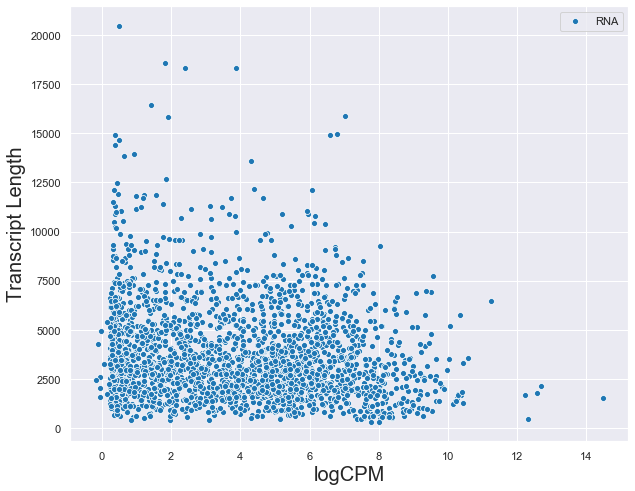

In [64]:
import seaborn as sns; sns.set()

fig = plt.figure(figsize = (10, 8))

ax = sns.scatterplot(x='logCPM', y='Transcript Length', data=merged, color = 'tab:blue', label = "RNA")

ax.set_xlabel('logCPM', fontsize = 20)
ax.set_ylabel('Transcript Length', fontsize = 20)
#ax.set_xscale('log')

In [65]:
import requests
import json
raw_counts = pd.read_csv("../Aging_mouse_data_AT2AM.csv")
url = "https://biotools.fr/mouse/ensembl_symbol_converter/"
id_json = json.dumps(raw_counts['Gene ID'].tolist())
data = {"api": [1,1,1], "ids": id_json}
response = requests.post(url, data = data)
output = json.loads(response.text)

raw_counts['Gene Name'] = output.values()
raw_counts

,Gene ID,AM_young_naive_20150416_1,AM_young_naive_20150416_2,AM_young_naive_20150416_3,AM_young_naive_20150416_4,AT2_young_naive_20150416_1,AT2_young_naive_20150416_2,AT2_young_naive_20150416_3,AT2_young_naive_20150416_4,AM_old_naive_20150416_1,AM_old_naive_20150416_2,AM_old_naive_20150416_3,AM_old_naive_20150416_4,AT2_old_naive_20150416_1,AT2_old_naive_20150416_2,AT2_old_naive_20150416_3,AT2_old_naive_20150416_4,Gene Name
0,ENSMUSG00000000001,1624,1746,1669,1715,1109,845,518,917,1661,1161,1218,2794,864,564,857,749,Gnai3
1,ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Pbsn
2,ENSMUSG00000000028,55,71,62,38,17,9,4,9,33,11,21,55,13,9,14,11,Cdc45
3,ENSMUSG00000000031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H19
4,ENSMUSG00000000037,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,Scml2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,ENSMUSG00000104523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gm37335
43426,ENSMUSG00000104524,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,Gm37333
43427,ENSMUSG00000104525,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Gm37334
43428,ENSMUSG00000104526,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1700045I11Rik
